In [ ]:
pip install innvestigate


/usr/local/lib/python3.10/dist-packages/innvestigate/backend/graph.py:467: UserWarning: Ignore dtype <dtype: 'float32'> as bias type.
  warnings.warn(f"Ignore dtype {dtype} as bias type.")
/usr/local/lib/python3.10/dist-packages/innvestigate/backend/graph.py:480: UserWarning: Ignore dtype <dtype: 'float32'> as bias type.
  warnings.warn(f"Ignore dtype {dtype} as bias type.")
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


TypeError: Invalid shape (100,) for image data

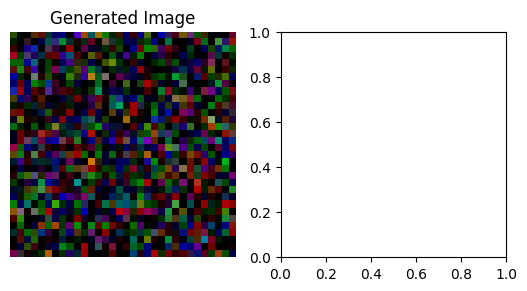

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


# Load your trained GAN model
# Replace 'your_model_path' with the path to your saved generator model
generator = keras.models.load_model('/content/generator_model.h5')

# Generate random noise as input to the generator
noise = np.random.normal(0, 1, size=(1, 100))

# Create a model without the final activation layer for LRP
lrp_model = keras.models.Model(inputs=generator.input, outputs=generator.layers[-2].output)

# Apply LRP using the innvestigate library
analyzer = innvestigate.create_analyzer("lrp.z", lrp_model)
relevance = analyzer.analyze(noise)

# Visualize the generated image and the corresponding relevance scores
plt.subplot(1, 2, 1)
plt.imshow(generator.predict(noise)[0])
plt.title('Generated Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(relevance[0], cmap='jet', vmin=0, vmax=np.max(relevance))
plt.title('Relevance Scores (LRP)')
plt.axis('off')

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import innvestigate
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Load your trained GAN model
# Replace 'your_model_path' with the path to your saved generator model
generator = keras.models.load_model('/content/generator_model_anime.h5')

# Generate random noise as input to the generator
noise = np.random.normal(0, 1, size=(1, 100))

# Create a model without the final activation layer for LRP
lrp_model = keras.models.Model(inputs=generator.input, outputs=generator.layers[-2].output)

# Apply LRP using the innvestigate library
analyzer = innvestigate.create_analyzer("lrp.z", lrp_model)
relevance = analyzer.analyze(noise)

# Visualize the generated image and the corresponding relevance scores
plt.subplot(1, 2, 1)
plt.imshow(generator.predict(noise)[0])
plt.title('Generated Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(relevance[0], cmap='jet', vmin=0, vmax=np.max(relevance))
plt.title('Relevance Scores (LRP)')
plt.axis('off')

plt.show()


OSError: Unable to open file (file signature not found)